In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
import pandas as pd
import numpy as np

In [4]:
df: pd.DataFrame = pd.read_csv(r"DATA/202209_YouBike2.0票證刷卡資料.csv")

In [ ]:
def ETL_ubike_date(df):
    '''
    Convert the type 
    '''
    df = df.astype({col: 'datetime64[ns]' for col in ['rent_time', 'return_time', 'infodate']} )
    df = df.astype({col: 'category' for col in ['rent_station', 'return_station']} )
    df = df.astype({col: 'timedelta64' for col in ['rent']} )
    return df
df = ETL_ubike_date(df)

In [ ]:
start = set(df.rent_station.unique())
end = set(df.return_station.unique())

In [ ]:
end - start

In [ ]:
mask_start_ntu = df.rent_station.str.contains('臺大')
mask_end_ntu = df.return_station.str.contains('臺大')
df_with_ntu = df[mask_end_ntu & mask_start_ntu]

In [ ]:
df_with_ntu = df_with_ntu.astype({ 'rent_time': 'datetime64[ns]' })

In [ ]:
df_with_ntu

,rent_time,rent_station,return_time,return_station,rent,infodate
18300,2022-09-30 14:00:00,臺大社科院西側,2022-09-30 14:00:00,臺大五號館西側,00:03:56,2022-09-30
18301,2022-09-30 14:00:00,臺大社科院西側,2022-09-30 14:00:00,臺大社科院西側,00:10:34,2022-09-30
18302,2022-09-30 10:00:00,臺大社科院西側,2022-09-30 10:00:00,臺大小福樓東側,00:02:08,2022-09-30
18303,2022-09-30 15:00:00,臺大社科院西側,2022-09-30 15:00:00,臺大總圖書館西南側,00:19:53,2022-09-30
18305,2022-09-30 06:00:00,臺大社科院西側,2022-09-30 06:00:00,臺大社科院西側,00:29:48,2022-09-30
...,...,...,...,...,...,...
2629393,2022-09-23 13:00:00,臺大小福樓東側,2022-09-23 13:00:00,臺大二號館,00:02:20,2022-09-23
2629394,2022-09-23 13:00:00,臺大小福樓東側,2022-09-23 13:00:00,臺大共同教室北側,00:02:41,2022-09-23
2629395,2022-09-23 13:00:00,臺大小福樓東側,2022-09-23 13:00:00,臺大共同教室東南側,00:04:47,2022-09-23
2629946,2022-09-23 18:00:00,臺大新體育館東南側,2022-09-23 18:00:00,臺大第一活動中心西南側,00:03:23,2022-09-23


In [ ]:
df_with_ntu.groupby(['infodate']).count()

,rent_time,rent_station,return_time,return_station,rent
infodate,,,,,
2022-09-01,2988,2988,2988,2988,2988
2022-09-02,1566,1566,1566,1566,1566
2022-09-03,798,798,798,798,798
2022-09-04,1120,1120,1120,1120,1120
2022-09-05,7997,7997,7997,7997,7997
2022-09-06,7012,7012,7012,7012,7012
2022-09-07,6857,6857,6857,6857,6857
2022-09-08,6702,6702,6702,6702,6702
2022-09-09,1123,1123,1123,1123,1123


In [ ]:
df_with_ntu.sort_values(by='rent')

,rent_time,rent_station,return_time,return_station,rent,infodate
401359,2022-09-15 17:00:00,臺大男六舍前,2022-09-15 17:00:00,臺大電機二館東南側,00:00:00,2022-09-15
2530267,2022-09-07 14:00:00,臺大五號館西側,2022-09-07 14:00:00,臺大工綜館南側,00:00:00,2022-09-07
2042019,2022-09-29 12:00:00,臺大思亮館東南側,2022-09-29 12:00:00,臺大社科院西側,00:00:01,2022-09-29
1454288,2022-09-28 13:00:00,臺大永齡生醫工程館,2022-09-28 13:00:00,臺大男七舍前,00:00:01,2022-09-28
1731747,2022-09-16 15:00:00,臺大社科院西側,2022-09-16 15:00:00,臺大女九舍西南側,00:00:01,2022-09-16
...,...,...,...,...,...,...
1223345,2022-09-02 14:00:00,臺大明達館機車停車場,2022-09-03 20:00:00,臺大工綜館南側,29:28:59,2022-09-02
1491136,2022-09-08 08:00:00,臺大共同教室東南側,2022-09-09 16:00:00,臺大卓越研究大樓,32:03:01,2022-09-08
1338592,2022-09-14 13:00:00,臺大第一活動中心西南側,2022-09-16 10:00:00,臺大第一活動中心西南側,44:57:26,2022-09-14
125962,2022-09-05 13:00:00,臺大森林館北側,2022-09-08 07:00:00,臺大小福樓東側,66:13:08,2022-09-05


In [8]:
from file_reader.preprocessing import YoubikeDataReader, YoubikeDataFactory
import filters.NTU
import filters.time_filter

Weekday = filters.time_filter.Weekday

file_location = r"DATA/202209_YouBike2.0票證刷卡資料.csv"

youbike_reader = YoubikeDataReader(file_location)


In [9]:
location_filter = filters.NTU.NTU_location_filter
upper_interval_filter = filters.time_filter.over_interval(hours=1, mins= 30)
lower_interval_filter = filters.time_filter.below_interval(hours=2)
weekend = filters.time_filter.weekday_filter([Weekday.SAT, Weekday.SUN])

youbike_df_factory = (
                        YoubikeDataFactory(youbike_reader)
                        .filter_location(location_filter)
                        .filter_time(upper_interval_filter)
                        .filter_time(lower_interval_filter)
                        .filter_time(weekend)
                    )

In [10]:
dff = youbike_df_factory.df

In [11]:
dff

,rent_time,rent_station,return_time,return_station,rent,infodate
140942,2022-09-25 15:00:00,臺大第一活動中心西南側,2022-09-25 17:00:00,臺大總圖書館西南側,0 days 01:36:51,2022-09-25
140943,2022-09-25 15:00:00,臺大第一活動中心西南側,2022-09-25 17:00:00,臺大總圖書館西南側,0 days 01:37:08,2022-09-25
203797,2022-09-17 19:00:00,臺大醫院兒童醫院,2022-09-17 20:00:00,臺大醫院兒童醫院,0 days 01:48:36,2022-09-17
334148,2022-09-25 17:00:00,臺大男七舍前,2022-09-25 19:00:00,臺大男七舍前,0 days 01:39:47,2022-09-25
334150,2022-09-25 17:00:00,臺大男七舍前,2022-09-25 19:00:00,臺大男七舍前,0 days 01:54:27,2022-09-25
...,...,...,...,...,...,...
2136137,2022-09-04 19:00:00,臺大水源修齊會館,2022-09-04 21:00:00,臺大水源修齊會館,0 days 01:56:04,2022-09-04
2136195,2022-09-04 17:00:00,臺大水源舍區B棟,2022-09-04 18:00:00,臺大水源舍區B棟,0 days 01:40:10,2022-09-04
2218852,2022-09-04 17:00:00,臺大凝態館南側,2022-09-04 18:00:00,臺大黑森林西側,0 days 01:49:45,2022-09-04
2219289,2022-09-04 17:00:00,臺大第一活動中心西南側,2022-09-04 18:00:00,臺大第一活動中心西南側,0 days 01:32:42,2022-09-04


In [51]:
new_fac = youbike_df_factory.duplicate()[0]

In [52]:
new_fac.filter_time(filters.time_filter.over_interval(hours=1, mins=50)).df

,rent_time,rent_station,return_time,return_station,rent,infodate
334150,2022-09-25 17:00:00,臺大男七舍前,2022-09-25 19:00:00,臺大男七舍前,0 days 01:54:27,2022-09-25
388227,2022-09-17 12:00:00,臺大資訊大樓,2022-09-17 14:00:00,臺大法人語言訓練中心前,0 days 01:53:08,2022-09-17
388228,2022-09-17 12:00:00,臺大資訊大樓,2022-09-17 14:00:00,臺大法人語言訓練中心前,0 days 01:53:02,2022-09-17
388229,2022-09-17 12:00:00,臺大資訊大樓,2022-09-17 14:00:00,臺大法人語言訓練中心前,0 days 01:51:25,2022-09-17
388230,2022-09-17 12:00:00,臺大資訊大樓,2022-09-17 14:00:00,臺大法人語言訓練中心前,0 days 01:54:03,2022-09-17
510947,2022-09-17 09:00:00,臺大永齡生醫工程館,2022-09-17 11:00:00,臺大男七舍前,0 days 01:58:24,2022-09-17
536019,2022-09-17 11:00:00,臺大動物醫院前,2022-09-17 12:00:00,臺大醫學院附設癌醫中心,0 days 01:50:04,2022-09-17
809720,2022-09-17 23:00:00,臺大水源舍區A棟,2022-09-18 01:00:00,臺大第一活動中心西南側,0 days 01:58:43,2022-09-17
830623,2022-09-17 15:00:00,臺大圖資系館北側,2022-09-17 17:00:00,臺大女九舍西南側,0 days 01:57:06,2022-09-17
831008,2022-09-17 18:00:00,臺大鹿鳴堂東側,2022-09-17 20:00:00,臺大教研館北側,0 days 01:53:31,2022-09-17


In [8]:
import sqlite3

# define path to database file
db_file = "SQL/202209_YouBike2.0票證刷卡資料.db"

# create a connection to the database file
conn = sqlite3.connect(db_file)

# create a cursor object to execute SQL commands

# execute a query to select data from the table
query = "SELECT * FROM data LIMIT 5"

df = pd.read_sql_query(query, conn)
# close the connection
conn.close()

df


,rent_time,rent_station,return_time,return_station,rent,infodate
0,2022-09-30 21:00:00,捷運大湖公園站(2號出口),2022-09-30 21:00:00,安湖三號公園,00:12:27,2022-09-30
1,2022-09-30 21:00:00,捷運大湖公園站(2號出口),2022-09-30 21:00:00,康寧公園(北側),00:12:56,2022-09-30
2,2022-09-30 21:00:00,捷運大湖公園站(2號出口),2022-09-30 21:00:00,大湖國小,00:11:10,2022-09-30
3,2022-09-30 21:00:00,捷運大湖公園站(2號出口),2022-09-30 21:00:00,康樂綠地,00:29:07,2022-09-30
4,2022-09-30 22:00:00,捷運大湖公園站(2號出口),2022-09-30 22:00:00,大湖國小,00:03:55,2022-09-30


## 加總同一個起訖站點的資訊

In [12]:
from file_reader.preprocessing import YoubikeDataReader, YoubikeDataFactory
import filters.NTU
import filters.time_filter

Weekday = filters.time_filter.Weekday

file_location = r"DATA/202209_YouBike2.0票證刷卡資料.csv"

youbike_reader = YoubikeDataReader(file_location)


In [80]:
location_filter = filters.NTU.NTU_location_filter
upper_interval_filter = filters.time_filter.over_interval(mins= 30)
lower_interval_filter = filters.time_filter.below_interval(hours=2)
weekend = filters.time_filter.weekday_filter([Weekday.SAT, Weekday.SUN])

youbike_df_factory = (
                        YoubikeDataFactory(youbike_reader)
                        .filter_location(location_filter)
                        .filter_time(upper_interval_filter)
                        .filter_time(lower_interval_filter)
                        .filter_time(weekend)
                    )

In [81]:
ntu_df = youbike_df_factory.df
ntu_df

,rent_time,rent_station,return_time,return_station,rent,infodate
85692,2022-09-25 00:00:00,臺大椰林小舖,2022-09-25 00:00:00,臺大椰林小舖,0 days 00:43:58,2022-09-25
104125,2022-09-25 21:00:00,臺大男一舍前,2022-09-25 22:00:00,臺大男一舍前,0 days 00:53:41,2022-09-25
104133,2022-09-25 06:00:00,臺大萬才館前,2022-09-25 06:00:00,臺大萬才館前,0 days 00:40:28,2022-09-25
112982,2022-09-25 17:00:00,臺大新生教室南側,2022-09-25 17:00:00,臺大新生教室南側,0 days 00:36:22,2022-09-25
113202,2022-09-25 17:00:00,臺大鄭江樓北側,2022-09-25 18:00:00,臺大管理學院二館北側,0 days 00:57:00,2022-09-25
...,...,...,...,...,...,...
2219416,2022-09-04 17:00:00,臺大一號館,2022-09-04 18:00:00,臺大一號館,0 days 01:22:02,2022-09-04
2219423,2022-09-04 19:00:00,臺大一號館,2022-09-04 20:00:00,臺大男六舍前,0 days 00:32:29,2022-09-04
2219424,2022-09-04 19:00:00,臺大一號館,2022-09-04 20:00:00,臺大卓越研究大樓,0 days 00:33:53,2022-09-04
2226963,2022-09-04 18:00:00,臺大共同教室北側,2022-09-04 20:00:00,臺大共同教室北側,0 days 01:52:49,2022-09-04


In [132]:
grouped = ntu_df.groupby(['rent_station','return_station']).agg({'rent': ['count', 'sum', 'max', 'min']})
grouped.columns = grouped.columns.map('_'.join)
grouped = grouped.sort_values(by = ('rent_count'), ascending=False).reset_index()

In [134]:
grouped[grouped['rent_station'] == grouped['return_station']]


,rent_station,return_station,rent_count,rent_sum,rent_max,rent_min
0,臺大男一舍前,臺大男一舍前,43,1 days 13:40:54,0 days 01:59:59,0 days 00:30:24
1,臺大水源舍區A棟,臺大水源舍區A棟,33,1 days 10:15:03,0 days 01:54:31,0 days 00:30:46
2,臺大社科院西側,臺大社科院西側,27,1 days 02:56:08,0 days 01:48:41,0 days 00:30:28
3,臺大第一活動中心西南側,臺大第一活動中心西南側,24,0 days 23:57:39,0 days 01:46:27,0 days 00:31:24
4,臺大農業陳列館北側,臺大農業陳列館北側,23,1 days 00:09:30,0 days 01:55:31,0 days 00:30:09
...,...,...,...,...,...,...
261,臺大資訊大樓,臺大資訊大樓,1,0 days 00:36:58,0 days 00:36:58,0 days 00:36:58
297,臺大第二行政大樓南側,臺大第二行政大樓南側,1,0 days 01:03:07,0 days 01:03:07,0 days 01:03:07
325,臺大二號館,臺大二號館,1,0 days 00:39:26,0 days 00:39:26,0 days 00:39:26
336,臺大思亮館東南側,臺大思亮館東南側,1,0 days 01:28:41,0 days 01:28:41,0 days 01:28:41


In [105]:
dup_ntu = youbike_df_factory.duplicate(1)[0]
dup_ntu.filter_time(filters.time_filter.over_interval(hours = 1))
dup_ntu_df = dup_ntu.df

In [106]:
dorm_exercise = dup_ntu_df[(dup_ntu_df['rent_station'] == dup_ntu_df['return_station']) &
       ( dup_ntu_df['rent_station'] == '臺大男一舍前')]
dorm_exercise_start_time = dorm_exercise['rent_time'].dt.hour

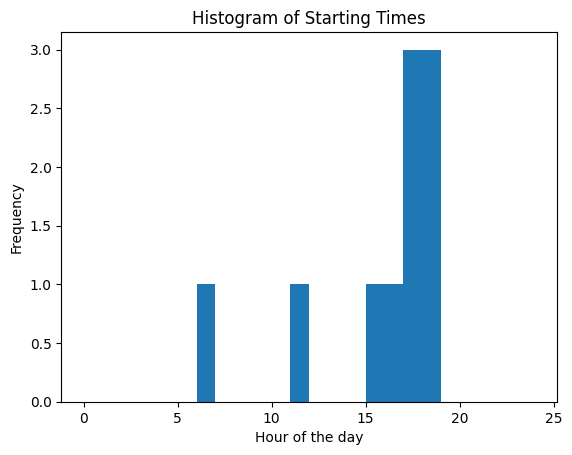

In [107]:
import matplotlib.pyplot as plt


plt.hist(dorm_exercise_start_time, bins=24, range=(0, 24), density=False, cumulative=False)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Histogram of Starting Times')
plt.show()


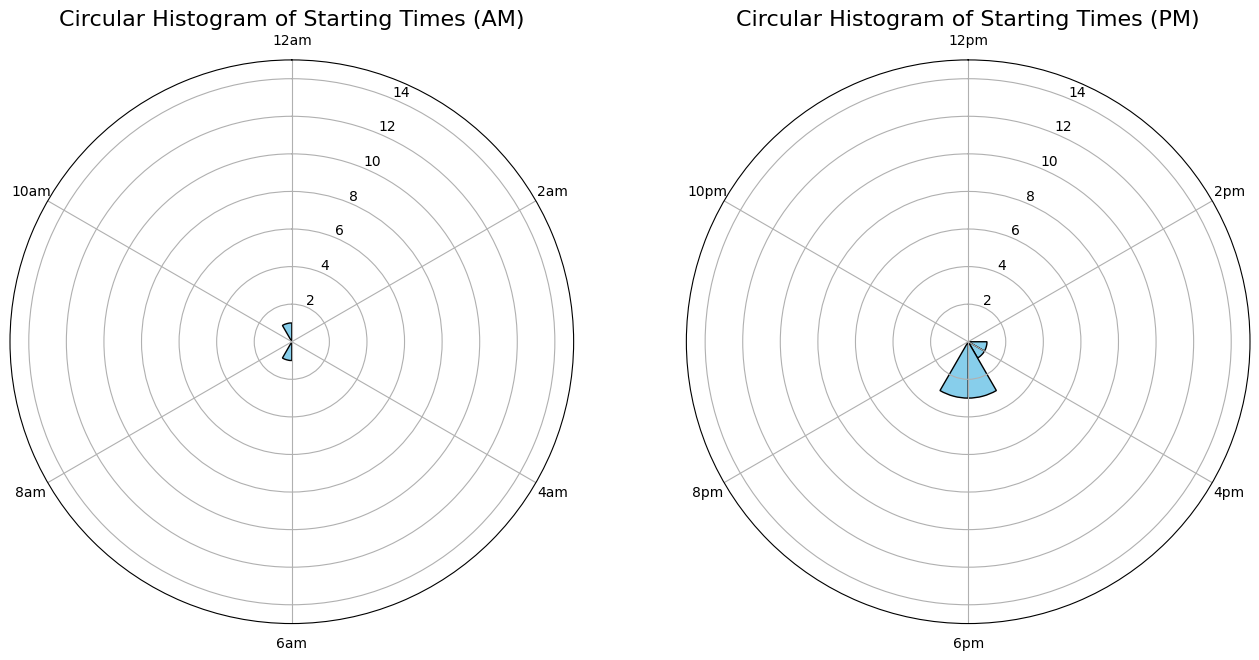

In [108]:
start_hours = dorm_exercise_start_time

# Create a mask for the hours from 0 to 12 and from 12 to 24
mask_am = (start_hours >= 0) & (start_hours < 12)
mask_pm = (start_hours >= 12) & (start_hours < 24)

# Convert hours to radians
theta_am = 2*np.pi*start_hours[mask_am]/12
theta_pm = 2*np.pi*(start_hours[mask_pm]-12)/12

# Create two polar histograms with 12 bins each
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': 'polar'})
ax1.hist(theta_am, bins=12, range=(0, 2 * np.pi), color='skyblue', edgecolor='k')
ax2.hist(theta_pm, bins=12, range=(0, 2* np.pi), color='skyblue', edgecolor='k')

# Set the direction of rotation to clockwise and set the labels
ax1.set_theta_direction(-1)
ax2.set_theta_direction(-1)
ax1.set_theta_zero_location('N')
ax2.set_theta_zero_location('N')
ax1.set_xticks(np.linspace(0, 2 * np.pi, 6, endpoint=False))
ax1.set_xticklabels(['12am', '2am', '4am', '6am', '8am', '10am'])
ax2.set_xticks(np.linspace(0, 2 * np.pi, 6, endpoint=False))
ax2.set_xticklabels(['12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
ax1.set_rlim(0, 15)
ax2.set_rlim(0, 15)

# Set the titles and show the plot
ax1.set_title('Circular Histogram of Starting Times (AM)', fontsize=16)
ax2.set_title('Circular Histogram of Starting Times (PM)', fontsize=16)
plt.show()

## Network Data

In [113]:
import networkx as nx

In [136]:
cleaned_count_ntu_data = grouped[['rent_station', 'return_station', 'rent_count']]


In [139]:
G = nx.from_pandas_edgelist(cleaned_count_ntu_data, source='rent_station', target='return_station', edge_attr=['rent_count'])

In [143]:
G.nodes

NodeView(('臺大男一舍前', '臺大水源舍區A棟', '臺大社科院西側', '臺大第一活動中心西南側', '臺大農業陳列館北側', '捷運臺大醫院站(4號出口)', '臺大男六舍前', '臺大卓越研究大樓', '臺大男七舍前', '臺大小福樓東側', '臺大椰林小舖', '臺大女九舍西南側', '臺大國青大樓宿舍前', '臺大計資中心南側', '臺大水源修齊會館', '臺大水源舍區B棟', '臺大醫院兒童醫院', '臺大工綜館南側', '臺大新生教室南側', '臺大總圖書館西南側', '臺大社會系館南側', '臺大綜合體育館停車場前', '臺大獸醫館南側', '臺大樂學館東側', '臺大醫學院附設癌醫中心', '臺大男八舍東側', '臺大凝態館南側', '臺大社科院圖書館前', '臺大新體育館東南側', '臺大大一女舍北側', '臺大一號館', '臺大鹿鳴堂東側', '臺大萬才館前', '臺大土木系館', '臺大五號館西側', '臺大共同教室北側', '臺大森林館北側', '臺大禮賢樓東南側', '臺大檔案展示館', '臺大農化新館西側', '臺大資訊大樓', '臺大法人語言訓練中心前', '臺大心理系館南側', '臺大舊體育館西側', '臺大黑森林西側', '臺大動物醫院前', '臺大天文數學館南側', '臺大明達館機車停車場', '臺大共同教室東南側', '臺大明達館北側(員工宿舍)', '臺大環研大樓', '臺大管理學院二館北側', '臺大生命科學館西北側', '臺大四號館東北側', '臺大博理館西側', '臺大二號館', '臺大教研館北側', '臺大博雅館西側', '臺大立體機車停車場', '臺大永齡生醫工程館', '臺大圖資系館北側', '臺大鄭江樓北側', '臺大電機二館東南側', '臺大土木研究大樓前', '捷運臺大醫院站(1號出口)', '臺大公館停車場西北側', '臺大第二行政大樓南側', '臺大小小福西南側', '臺大思亮館東南側', '臺大原分所北側'))

## 取得 Youbike 位置

In [145]:
import requests as rq

In [147]:
youbike_stop_data = rq.get("https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json").json()

In [149]:
youbike_stop_dataframe = pd.DataFrame(youbike_stop_data)

In [151]:
youbike_stop_dataframe['sna'] = youbike_stop_dataframe['sna'].str.replace('YouBike2.0_', '')

/var/folders/cf/zj8139lx2tz461mknf_0j4jm0000gn/T/ipykernel_14687/2783471935.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  youbike_stop_dataframe['sna'] = youbike_stop_dataframe['sna'].str.replace('YouBike2.0_', '')


In [153]:
youbike_stop_loc = youbike_stop_dataframe[['sno','sna','lat', 'lng']]

In [155]:
youbike_stop_loc.to_parquet('DATA/coord.pq')

## 畫在地圖上

In [156]:
import folium

In [175]:
# merge lat, lng to data

merged_data = cleaned_count_ntu_data.merge(youbike_stop_loc, left_on='rent_station', right_on='sna') \
    .merge(youbike_stop_loc, left_on='return_station', right_on='sna', suffixes=('_rent', '_return')).query('rent_count > 1')

# drop the redundant columns
merged_data = merged_data[['rent_station', 'return_station', 'rent_count', 'lat_rent', 'lng_rent', 'lat_return', 'lng_return']]

merged_data

,rent_station,return_station,rent_count,lat_rent,lng_rent,lat_return,lng_return
0,臺大男一舍前,臺大男一舍前,43,25.01637,121.54535,25.01637,121.54535
2,臺大男六舍前,臺大男一舍前,2,25.01664,121.54520,25.01637,121.54535
4,臺大小福樓東側,臺大男一舍前,4,25.01846,121.53760,25.01637,121.54535
6,臺大男八舍東側,臺大男一舍前,2,25.01729,121.54531,25.01637,121.54535
9,臺大一號館,臺大男一舍前,2,25.01698,121.53455,25.01637,121.54535
...,...,...,...,...,...,...,...
492,臺大共同教室東南側,臺大資訊大樓,3,25.01566,121.53786,25.02101,121.54153
493,臺大五號館西側,臺大五號館西側,5,25.01666,121.53718,25.01666,121.53718
494,臺大四號館東北側,臺大五號館西側,2,25.01703,121.53781,25.01666,121.53718
497,臺大檔案展示館,臺大檔案展示館,5,25.01391,121.52895,25.01391,121.52895


In [183]:
map_center = [25.0169457,121.5385459] # Set the center of the map
zoom_level = 15 # Set the zoom level of the map
m = folium.Map(location=map_center, zoom_start=zoom_level)


In [184]:
for index, row in merged_data.iterrows():
    source = (row['lat_rent'], row['lng_rent'])
    target = (row['lat_return'], row['lng_return'])
    count = row['rent_count']

    # Define the style of the line
    line_color = '#3388ff'
    line_opacity = 0.5
    line_weight = count

    # Create a folium.PolyLine object and add it to the map
    folium.PolyLine([source, target], color=line_color, weight=line_weight, opacity=line_opacity).add_to(m)

In [185]:
m